In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,InputLayer
from __future__ import absolute_import, division, print_function
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle
import requests

In [23]:
data = pd.read_csv("C:\\Users\\Dania\\Documents\\datahw.csv")
print (type(data))
train, test = train_test_split(data, test_size = 0.2)
trainX = train.drop(['rating','wet','label'], axis=1)
trainY = train['label']
testX = test.drop(['rating','wet','label'], axis=1)
testY = test['label']
print (trainX.shape)
print (trainY.shape)

<class 'pandas.core.frame.DataFrame'>
(292, 4)
(292,)


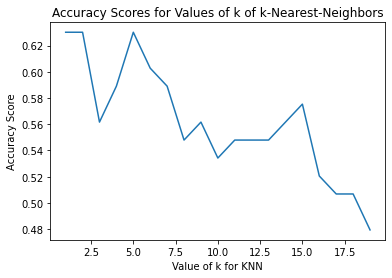

In [3]:
k_range = list(range(1,20))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(trainX, trainY)
    y_pred = knn.predict(testX)
    scores.append(metrics.accuracy_score(testY, y_pred))
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [15]:
model=KNeighborsClassifier(n_neighbors=1) #this examines 3 neighbours for putting the new data into a class
model.fit(trainX,trainY)
mymod= LogisticRegression()
mymod.fit(trainX,trainY)
prediction=model.predict(testX)
print('The accuracy of the model is:',metrics.accuracy_score(prediction,testY))
print (testX)
print (prediction)
#model.model.save("C:\\test_model.h5")

The accuracy of the model is: 0.6301369863013698
     Wind Speed  average temperature  precipitation  snow fall
284      3.5420            12.500000          0.000       0.00
104     17.0499            11.388889          0.000       0.00
241     14.2163            28.055556          0.000       0.00
319      9.6600            10.833333         45.974       0.00
131     20.3343            17.222222          0.000       0.00
..          ...                  ...            ...        ...
296      2.7531            11.666667          0.000       0.00
343      3.4776             1.111111          0.000       0.00
351      9.0643            -0.277778         18.542      71.12
253     17.6456            27.777778          0.000       0.00
261     10.3362            24.444444          0.000       0.00

[73 rows x 4 columns]
[ 5  5  0 26  2 17  1 12  5  1  7  4  4  1  7  1  1  2  5  1  7 11  4  6
  1 14  3  7  1  6  0  2  2  9  2  1 15  1  5  0  7 10 21 26  5  7 15  3
  1  1 15  4 15 17 17 11  

c:\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
data2 =pd.read_csv("C:\\Users\\Dania\\Documents\\Book2.csv")
a=data2.drop(['rating','wet','label'], axis=1)
b = data2['label']
prediction=model.predict(a)
print('The accuracy of the model is:',metrics.accuracy_score(prediction,b))
print (a)
print (type(prediction))

The accuracy of the model is: 0.0
   Wind Speed  average temperature  precipitation  snow fall
0          22                  -16              0         23
<class 'numpy.ndarray'>


In [18]:
pickle.dump(model, open("model.sav", 'wb'))

In [33]:
import requests
api_result = requests.get('http://2ff67e2eb722.ngrok.io/weather')
print (api_result.json)

<bound method Response.json of <Response [200]>>


In [50]:
files = {'pic': open('image2.jpg', 'rb')}
f=requests.post('https://4b0fb3c5515f.ngrok.io/image', files=files)
print( f.text)

You may be underdressed for the weather also you probably won't need that umbrella
